In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
for date in recent_date:
    print(f"The most recent date is {date}")

The most recent date is 2017-08-23


The date one year back is 2016-08-23


Text(0, 0.5, 'Inches')

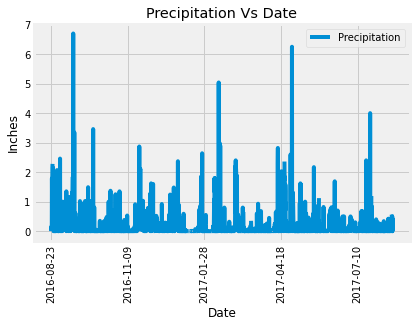

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

sel=[measurement.date,measurement.prcp]

# Starting from the most recent data point in the database. 
recent_date=dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
last_year_date=recent_date-dt.timedelta(days=365)
print(f"The date one year back is {last_year_date}")

# Perform a query to retrieve the data and precipitation scores
prev_year_data=session.query(*sel).filter(measurement.date>=last_year_date).order_by(measurement.date).all()



# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(prev_year_data,columns=['Date','Precipitation'])
precipitation_df.set_index(precipitation_df['Date'],inplace=True)

# Sort the dataframe by date
precipitation_df=precipitation_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=90)
plt.title("Precipitation Vs Date")
plt.xlabel("Date")
plt.ylabel("Inches")



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.id)).all()

[(9)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp=session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
highest_temp=session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
avg_temp=session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
print(f"The lowest temperature is {lowest_temp[0][0]}, the highest temperature is {highest_temp[0][0]}, the average temperature is {round(avg_temp[0][0],3)}")

The lowest temperature is 54.0, the highest temperature is 85.0, the average temperature is 71.664


Text(0.5, 18.5, 'Temperature')

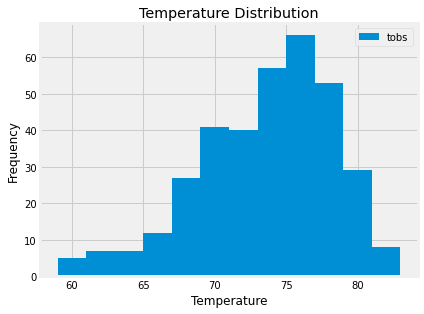

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results=session.query(measurement.tobs).filter(measurement.station=='USC00519281').\
        filter(measurement.date>=last_year_date).all()
temp_df=pd.DataFrame(results,columns=['tobs'])
temp_df.head()
temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.title("Temperature Distribution")
plt.xlabel("Temperature")

# Close session

In [16]:
# Close Session
session.close()